# Dataset: **Breast Cancer Wisconsin (Diagnostic)**

Data source [here](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data) and documentation [here](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.names)

Data summary:
```
 Sample code number          : Id number
 Clump Thickness             : 1–10
 Uniformity of Cell Size     : 1–10
 Uniformity of Cell Shape    : 1–10
 Marginal Adhesion           : 1–10
 Single Epithelial Cell Size : 1–10
 Bare Nuclei                 : 1–10
 Bland Chromatin             : 1–10
 Normal Nucleoli             : 1–10
 Mitoses                     : 1–10
 Class                       : 2 for benign, 4 for malignant
```



# Imports

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils import preprocess_data

In [ ]:
data_new = data.copy()
contraria = lambda x: 0 if x == 1 else 1
data_new['Class'] = data_new['Class'].apply(lambda x: x if np.random.uniform(0,1) > 0.3 else contraria(x))

# **1. Load Data**

In [2]:
data_source = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
data_raw = pd.read_csv(data_source, header=None)
data_raw

0   1   2   3   4   5   6   7   8   9   10
0    1000025   5   1   1   1   2   1   3   1   1   2
1    1002945   5   4   4   5   7  10   3   2   1   2
2    1015425   3   1   1   1   2   2   3   1   1   2
3    1016277   6   8   8   1   3   4   3   7   1   2
4    1017023   4   1   1   3   2   1   3   1   1   2
..       ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
694   776715   3   1   1   1   3   2   1   1   1   2
695   841769   2   1   1   1   2   1   1   1   1   2
696   888820   5  10  10   3   7   3   8  10   2   4
697   897471   4   8   6   4   3   4  10   6   1   4
698   897471   4   8   8   5   4   5  10   4   1   4

[699 rows x 11 columns]

# **2. Data Cleaning and Preprocessing**

Data very rarely arrives to us in a format that we can immediately throw to a Machine Learning Model to get some results right away. 

So the process of `data cleaning` is a necessary first step in Machine Learning Development, and it requires analyzing the data thoroughly, realizing its problems and fixing them, and putting it into a format that is ready to be "consumed" by Machine Learning.

In fact, cleaning the data will take most of the time in a Machine Learning Project. Because after the data is cleaned, we just need to train a bunch of models and select the best one and evaluate. But the data cleaning itself is different from dataset to dataset and can take a long time to finish.

In this course, we will ignore this step of `data cleaning` so that we can just focus on the important parts: 
1) Understanding how we can apply ML to data, 
2) Train models, 
3) evaluating performance, 
4) Interpreting Model predictions. 

If you are curious, we prepared a step by step tutorial on how we cleaned this data in the notebook `data_cleaning.ipynb`

In [3]:
data = preprocess_data(data_raw)
data

Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
Id                                                                            
1000025                5                        1                         1   
1002945                5                        4                         4   
1015425                3                        1                         1   
1016277                6                        8                         8   
1017023                4                        1                         1   
...                  ...                      ...                       ...   
776715                 3                        1                         1   
841769                 2                        1                         1   
888820                 5                       10                        10   
897471                 4                        8                         6   
897471                 4                        8                         8   

         Clump Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
Id                                                                           
1000025                        1                            2          1.0   
1002945                        5                            7         10.0   
1015425                        1                            2          2.0   
1016277                        1                            3          4.0   
1017023                        3                            2          1.0   
...                          ...                          ...          ...   
776715                         1                            3          2.0   
841769                         1                            2          1.0   
888820                         3                            7          3.0   
897471                         4                            3          4.0   
897471                         5                            4          5.0   

         Bland Chromatin  Normal Nucleoli  Mitoses  Class  
Id                                                         
1000025                3                1        1      0  
1002945                3                2        1      0  
1015425                3                1        1      0  
1016277                3                7        1      0  
1017023                3                1        1      0  
...                  ...              ...      ...    ...  
776715                 1                1        1      0  
841769                 1                1        1      0  
888820                 8               10        2      1  
897471                10                6        1      1  
897471                10                4        1      1  

[699 rows x 10 columns]

### **3. Exploratory Data Analysis (EDA)**

Plot histogram for each feature

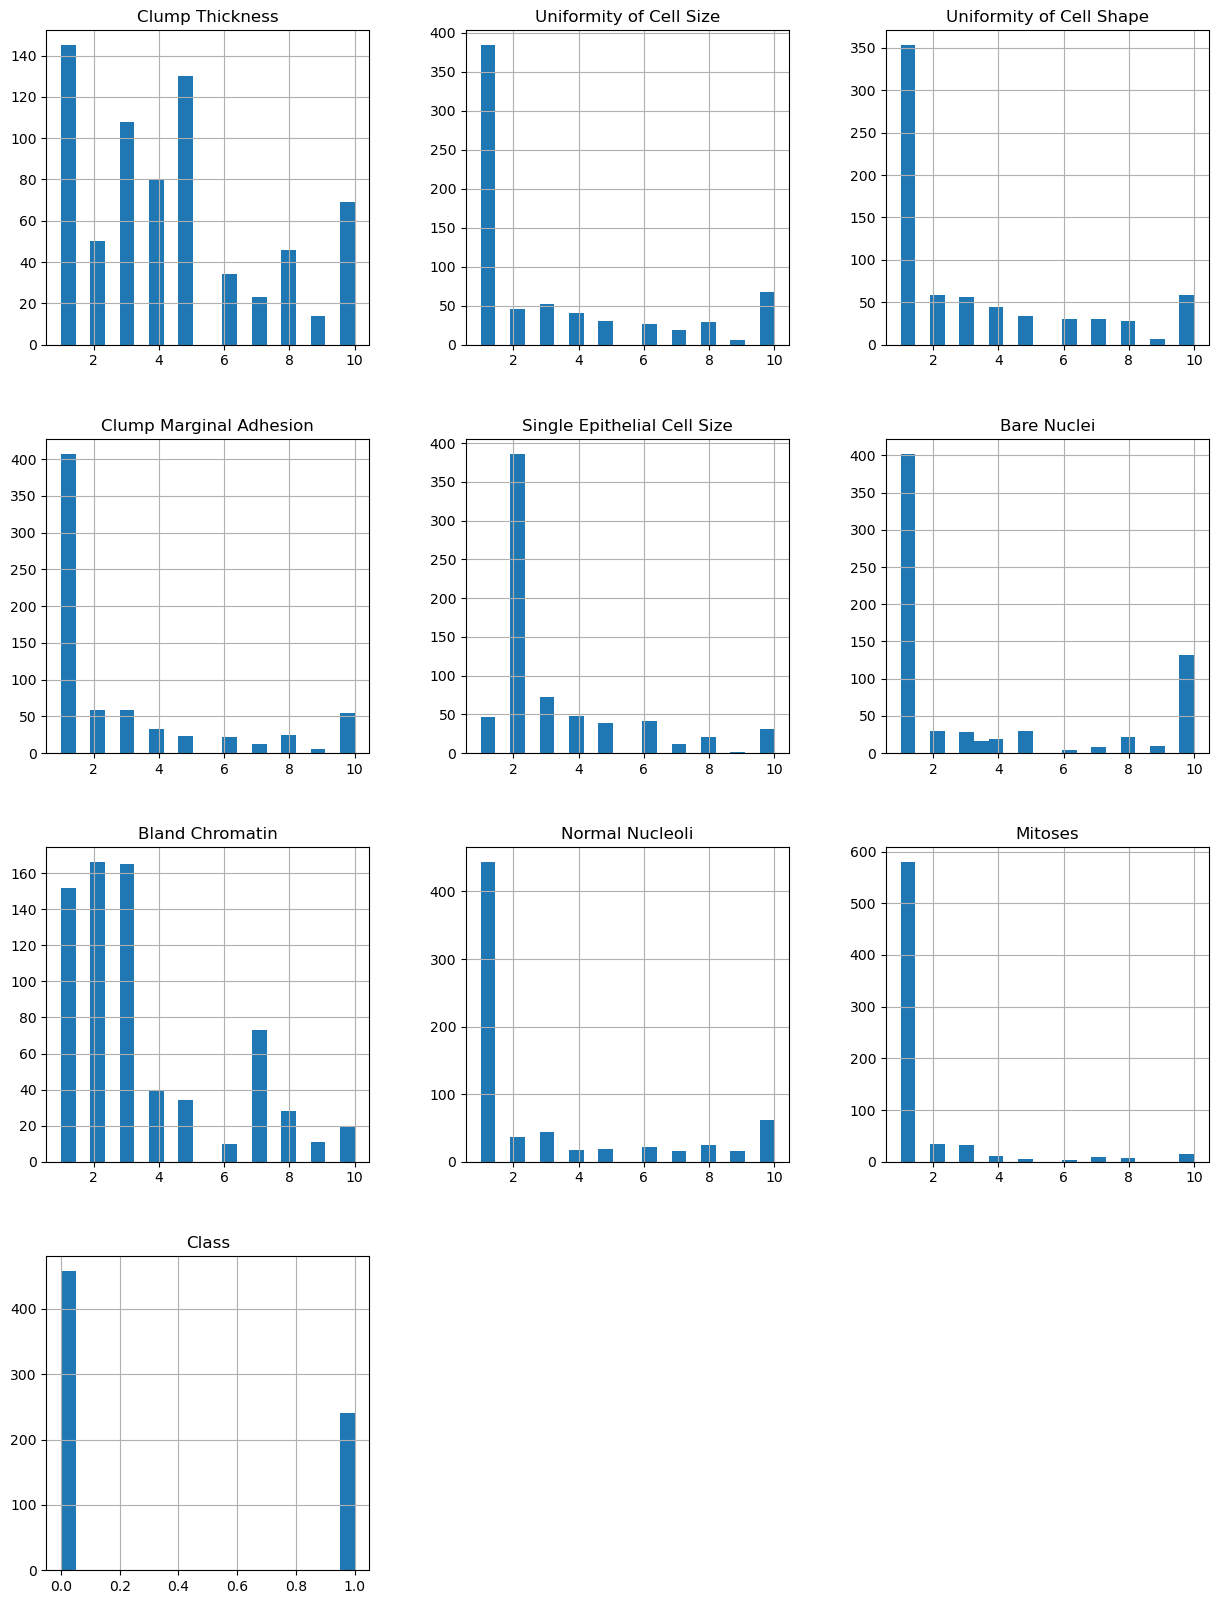

In [4]:
hists = data.hist(bins=20, figsize=(15,20))
plt.show()

Plot heatmap of correlations between the variables

In [5]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

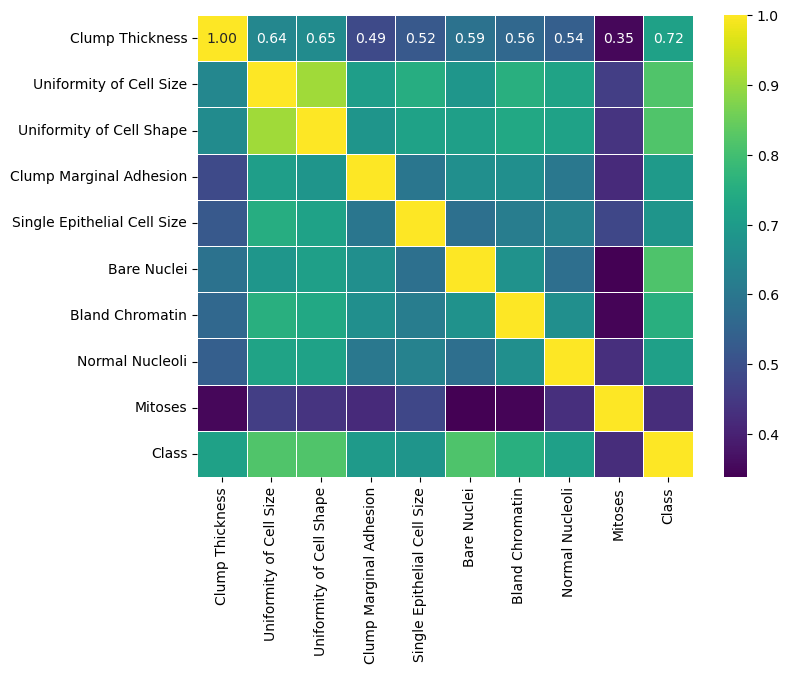

In [6]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap= 'viridis',fmt='.2f', linewidths=0.5)
plt.show()

Boxplots for each variable, separated by the class (benign or malignant)

In [7]:
# Define the variables to plot -- all except the targer ("Class" column)
variables = data.columns[:-1]

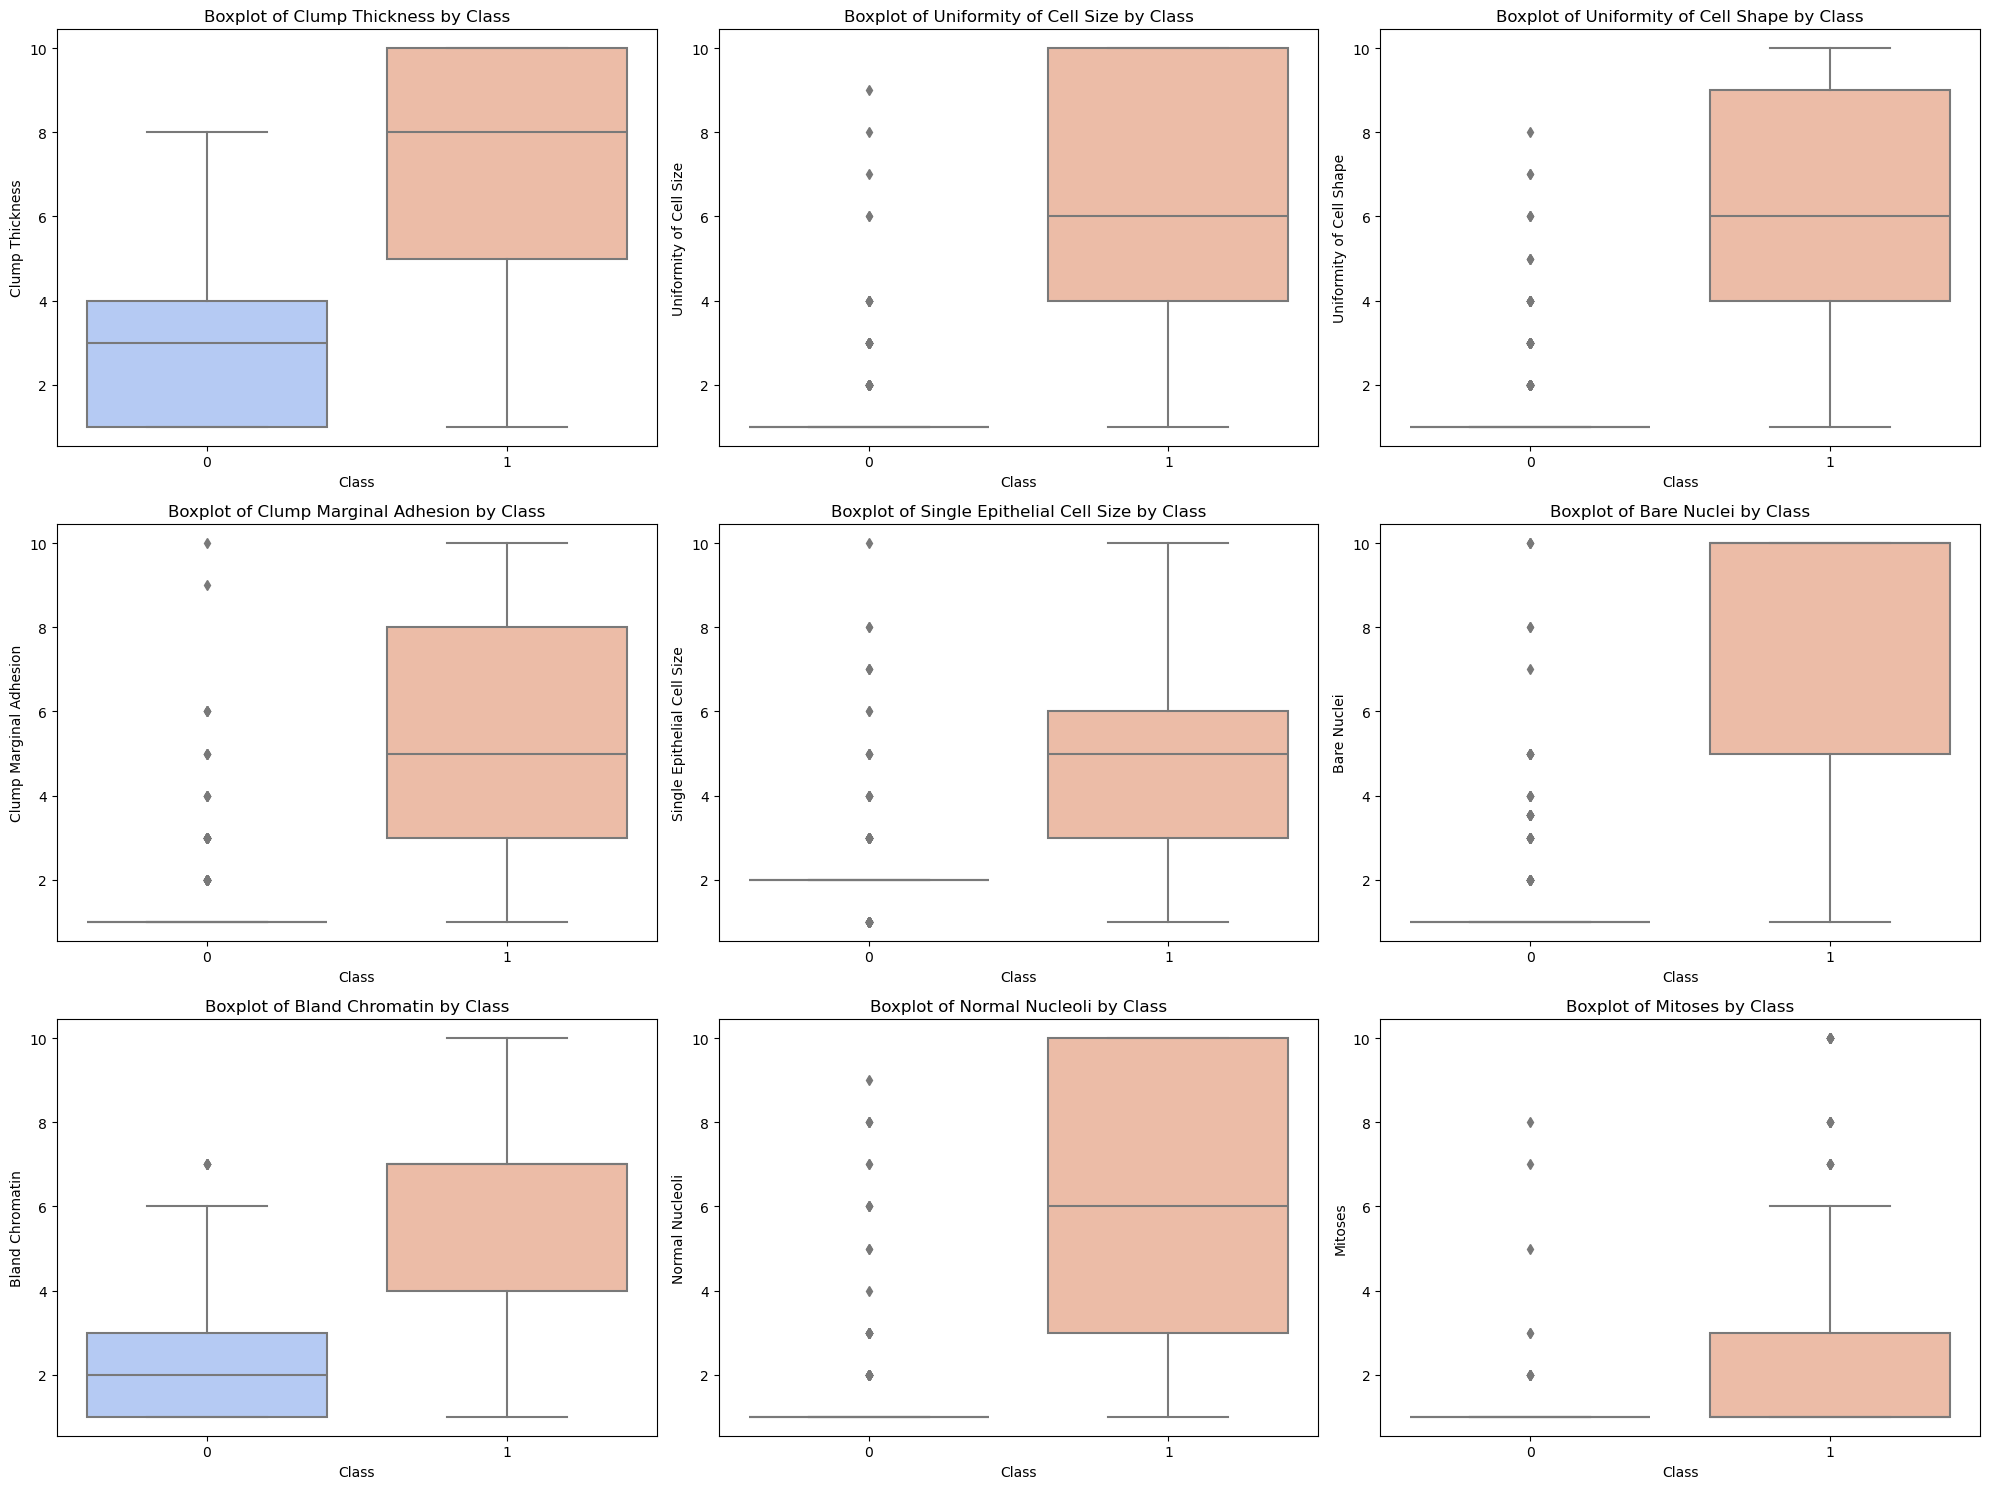

In [8]:
plt.figure(figsize=(20, 15))
for i, var in enumerate(variables):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Class', y=var, data=data, palette='coolwarm')
    plt.title(f'Boxplot of {var} by Class')
    plt.xlabel('Class')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

Pairplot with kernel density estimates (KDE):
- Pairwise relationships visualizations between features as well as the distribution of individual features, categorized by class. 

/anaconda/envs/mlcourse_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/anaconda/envs/mlcourse_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/anaconda/envs/mlcourse_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/anaconda/envs/mlcourse_env/lib/python3.11/site-packages/seaborn/_

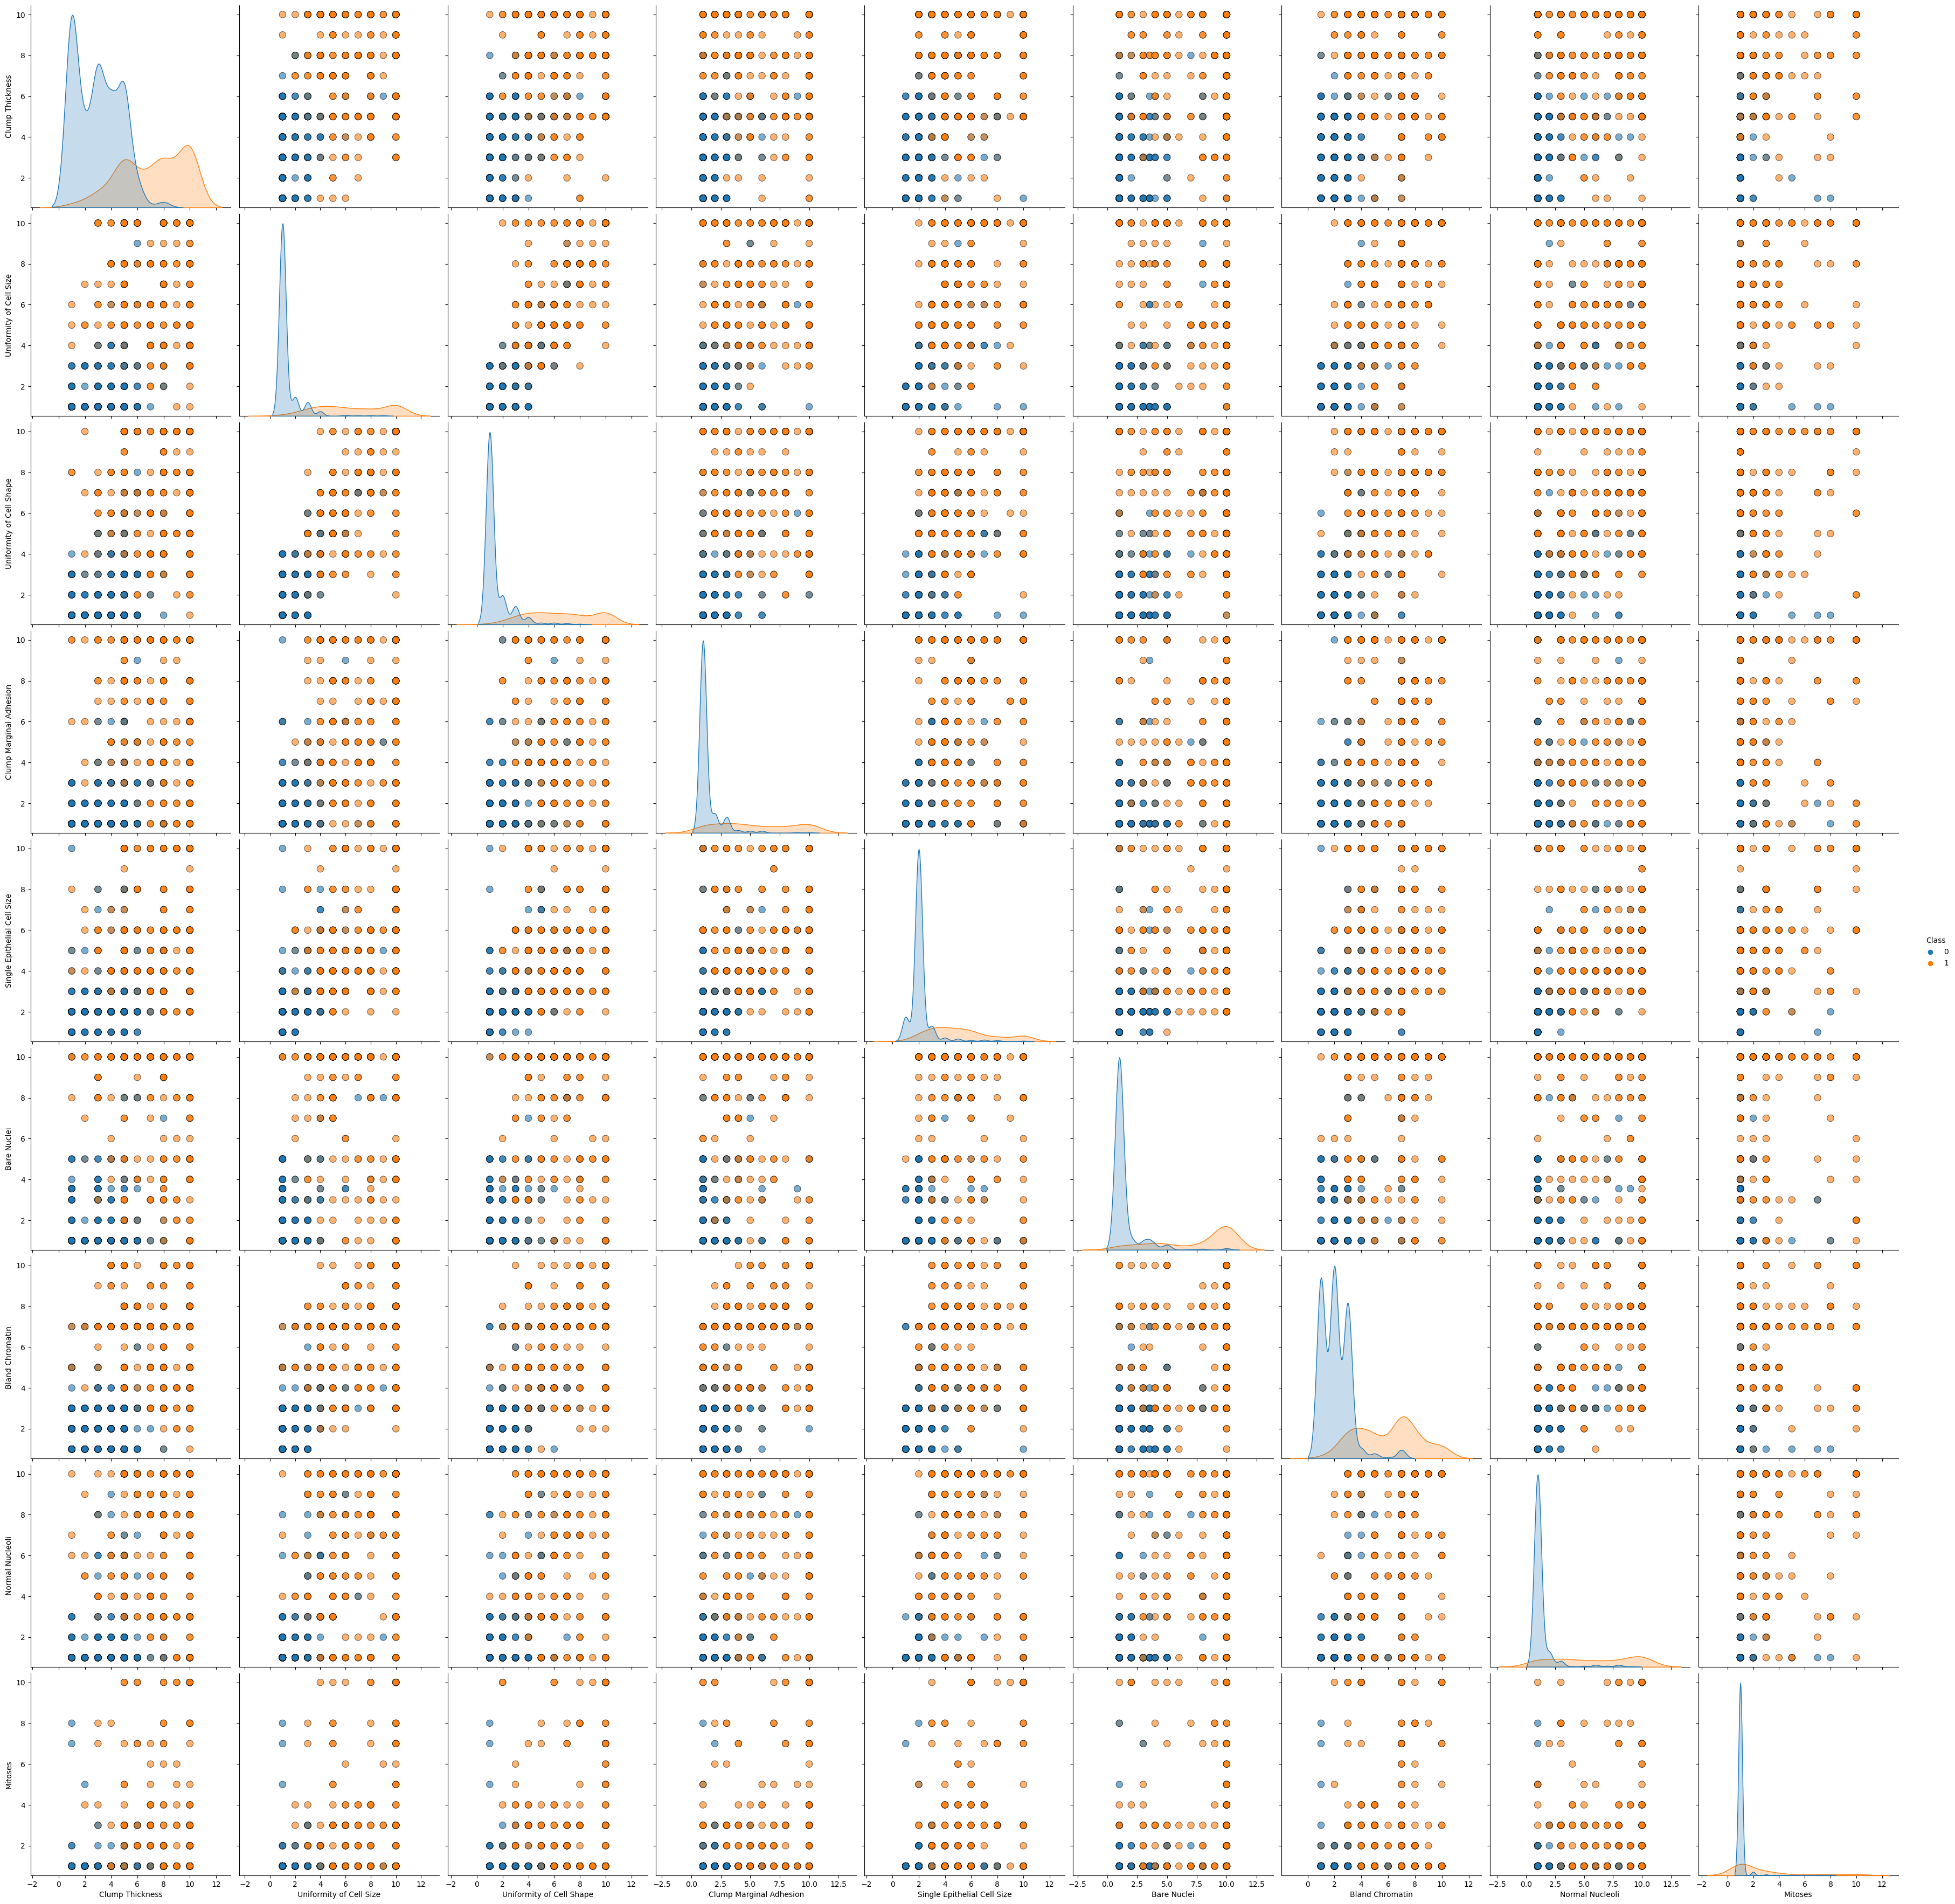

In [9]:
# Create the default pairplot
sns.pairplot(data, hue = 'Class', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 4)


# The diagonal diagrams describe the marginal distribution of the data in each column.
# The other diagrams describe the relationship (or lack thereof) between two variable

### **4. Build Model**

In [8]:
# Using information from all columns (0-9) to predict target (column 10)
X = df.iloc[:, :9]
Y = df.iloc[:, 9]

# Splitting between traning and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Checking the shapes to get an understanding of the problem
print( X_train.shape, X_test.shape )
print( Y_train.shape, Y_test.shape )

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(559, 9) (140, 9)
(559,) (140,)


#### **4.1 Decision Trees**

In [9]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### **4.1.1 Decision Trees - Predictions**

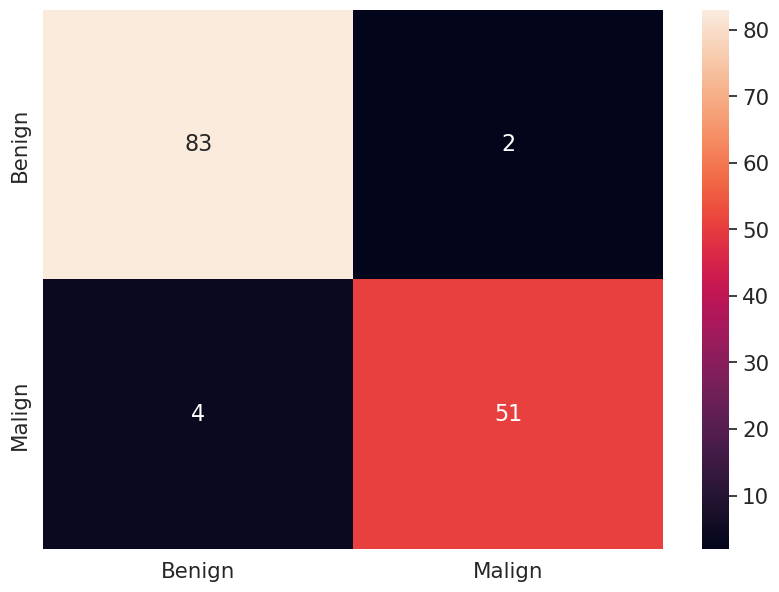

0.9571428571428572


In [10]:
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

Y_pred = dtree.predict(X_test)
print(Y_pred)
Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred]
cm = confusion_matrix(Y_test, Y_pred)

df_cm = pd.DataFrame(cm, index = ["Benign", "Malign"],
                  columns = ["Benign", "Malign"])
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})
plt.show()

print(accuracy_score(Y_test, Y_pred))

#### **4.1.2 Decision Trees - Visualize Tree**

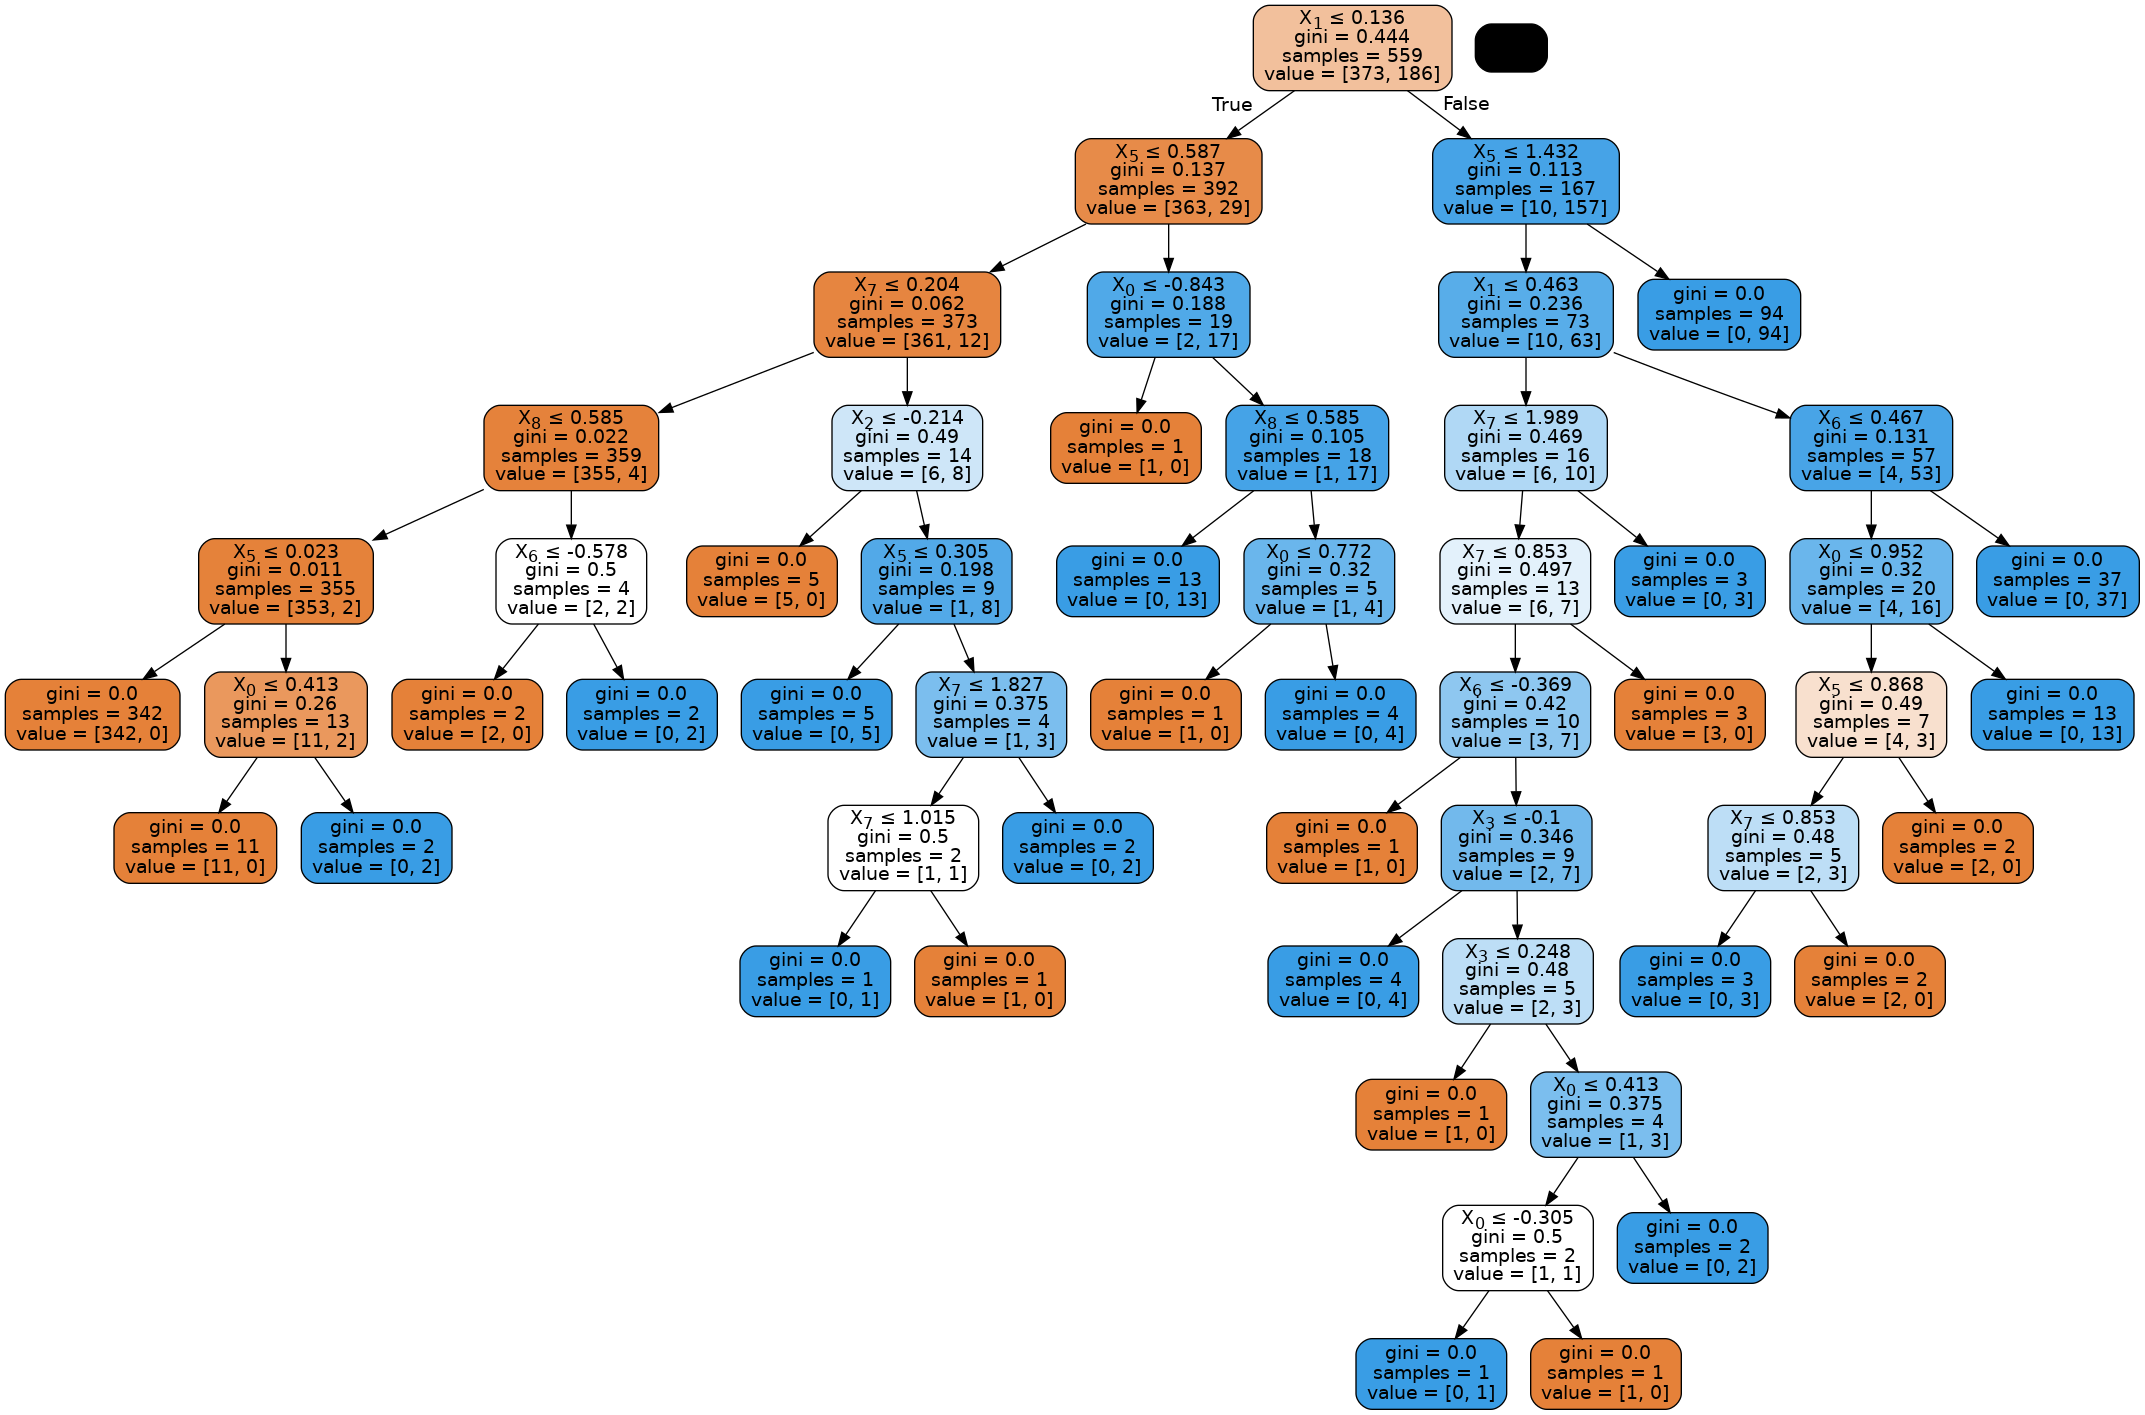

In [11]:
# Visualize Decision Tree
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### **4.1.3 Decision Trees - Explanation**

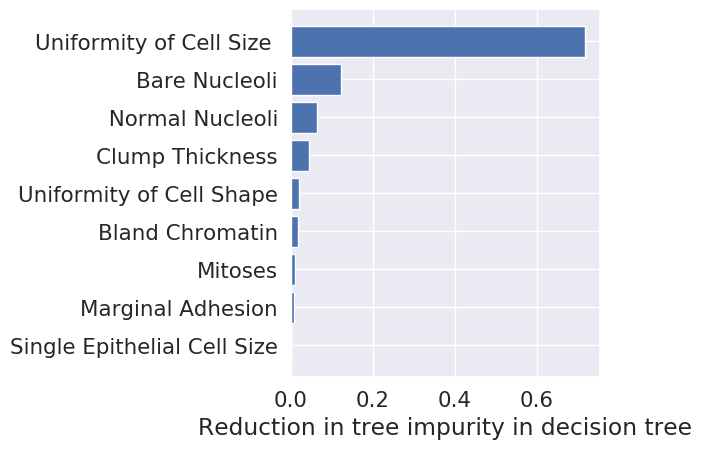

In [12]:
import numpy as np
import matplotlib.pyplot as plt
# Feature importance dataframe
imp_df = pd.DataFrame({'feature': ["Clump Thickness","Uniformity of Cell Size ","Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nucleoli", "Bland Chromatin"," Normal Nucleoli", "Mitoses"],
                       'importance': dtree.feature_importances_})
 
# Reorder by importance
ordered_df = imp_df.sort_values(by='importance')
imp_range=range(1,len(imp_df.index)+1)
 
## Barplot with confidence intervals
height = ordered_df['importance']
bars = ordered_df['feature']
y_pos = np.arange(len(bars))


# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)

plt.xlabel("Reduction in tree impurity in decision tree")

plt.tight_layout()
# Show graphic
plt.show()



/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
2023-05-25 16:31:04.679840: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-25 16:31:06.063659: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn

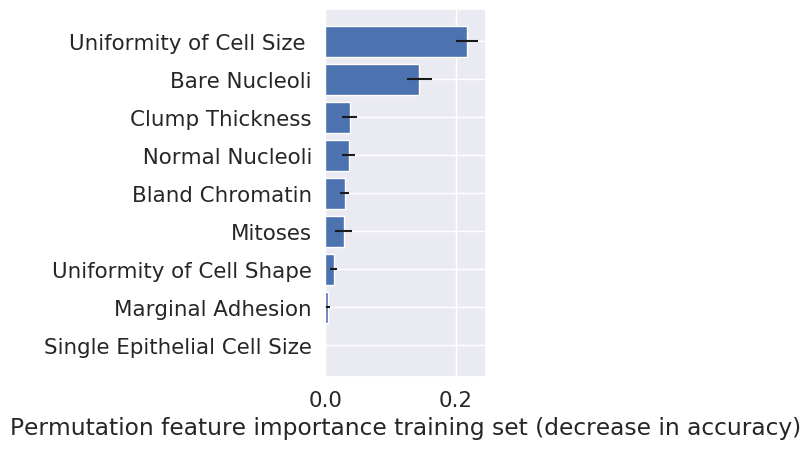

In [13]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.metrics.scorer import make_scorer

import matplotlib.pyplot as plt
# Feature importance based on TRAINING set
#eli5 provides a way to compute feature importances for any black-box estimator by measuring how score decreases when a feature is not available
perm_test = PermutationImportance(dtree, scoring=make_scorer(accuracy_score),
                                   n_iter=50, cv="prefit")

# fit and see the permuation importances
perm_test.fit(X_train, Y_train)

imp_df = eli5.explain_weights_df(perm_test)
label_df = pd.DataFrame({'feature': [ "x" + str(i) for i in range(9)], 'feature_name': ["Clump Thickness","Uniformity of Cell Size ","Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nucleoli", "Bland Chromatin"," Normal Nucleoli", "Mitoses"]})
imp_df = pd.merge(label_df, imp_df, on='feature', how='inner', validate="one_to_one")
 
# Reorder by importance
ordered_df = imp_df.sort_values(by='weight')
imp_range=range(1,len(imp_df.index)+1)
 

## Barplot with confidence intervals

height = ordered_df['weight']
bars = ordered_df['feature_name']
ci = 1.96 * ordered_df['std']
y_pos = np.arange(len(bars))

# Create horizontal bars
plt.barh(y_pos, height, xerr=ci)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)

plt.xlabel("Permutation feature importance training set (decrease in accuracy)")
plt.tight_layout()

# Show graphic
plt.show()

Intercept 0.4587079403972345
Prediction_local [1.12430525]
Right: 1.0


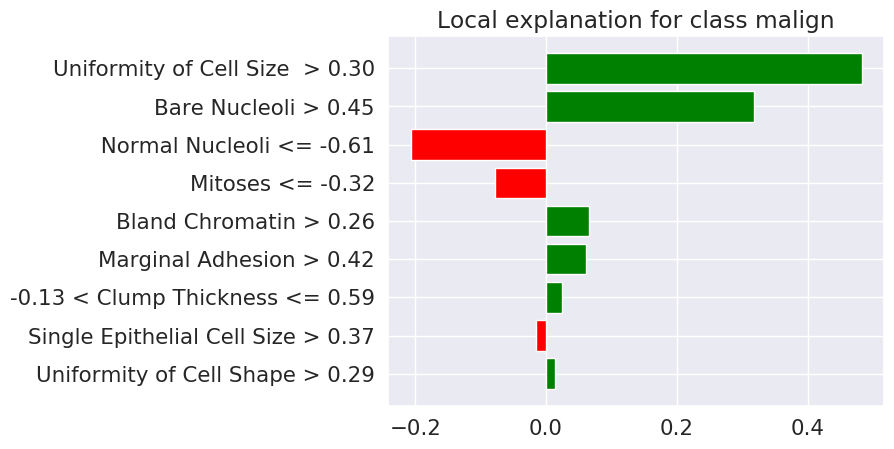

In [14]:
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt

X_explain = X_test
explainer = lime.lime_tabular.LimeTabularExplainer(training_data=X_train,
                                                   feature_names=["Clump Thickness","Uniformity of Cell Size ","Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nucleoli", "Bland Chromatin"," Normal Nucleoli", "Mitoses"],
                                                   discretize_continuous=True,
                                                   class_names=["benign", "malign"],
                                                   mode="classification",
                                                   verbose=True)

#Explaining first subject in test set using all 30 features
exp = explainer.explain_instance(X_explain[21,:], dtree.predict_proba, 
                                 num_features=10)
#Plot local explanation
plt = exp.as_pyplot_figure()
#plt.tight_layout()
exp.show_in_notebook(show_table=True)

#### **4.2 Multilayer Perceptron**

In [15]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout
from keras_tqdm import TQDMNotebookCallback

model = Sequential()
model.add(Dense(16, input_dim=(9), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.summary()

history= model.fit(X_train, Y_train,batch_size=16,validation_split=0.2, epochs=30,verbose=2)



2023-05-25 16:34:22.493299: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

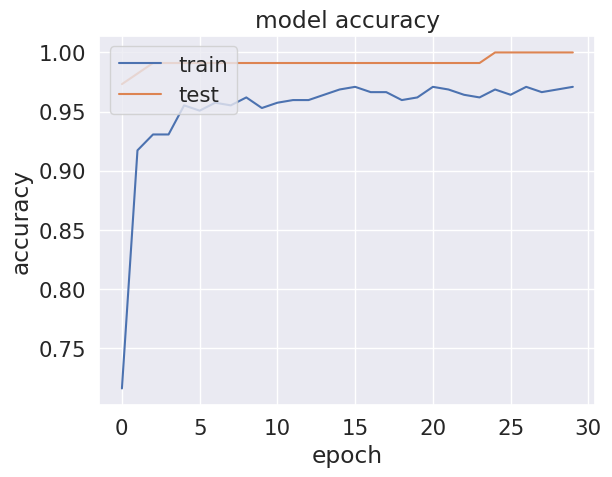

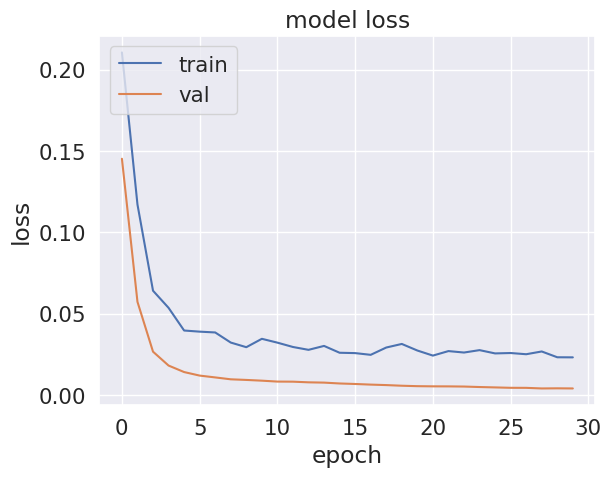

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### **4.2.1 Multilayer Perceptron - Predictions**

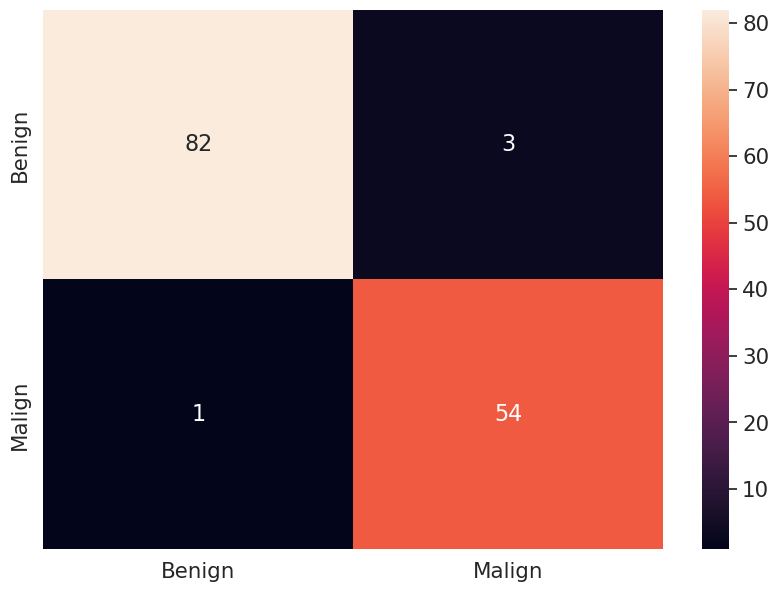

0.9714285714285714


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

Y_pred = model.predict(X_test,verbose=0)
Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred]
cm = confusion_matrix(Y_test, Y_pred)

df_cm = pd.DataFrame(cm, index = ["Benign", "Malign"],
                  columns = ["Benign", "Malign"])
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})
plt.show()
print(accuracy_score(Y_test, Y_pred))

#### **4.2.2 Multilayer Perceptron - Explanation**

(1, 9)
[[0.00028091]]
Intercept 0.5567550704966053
Prediction_local [1.45198567]
Right: 0.9990845918655396


/anaconda/envs/azureml_py38/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:429: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:429: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


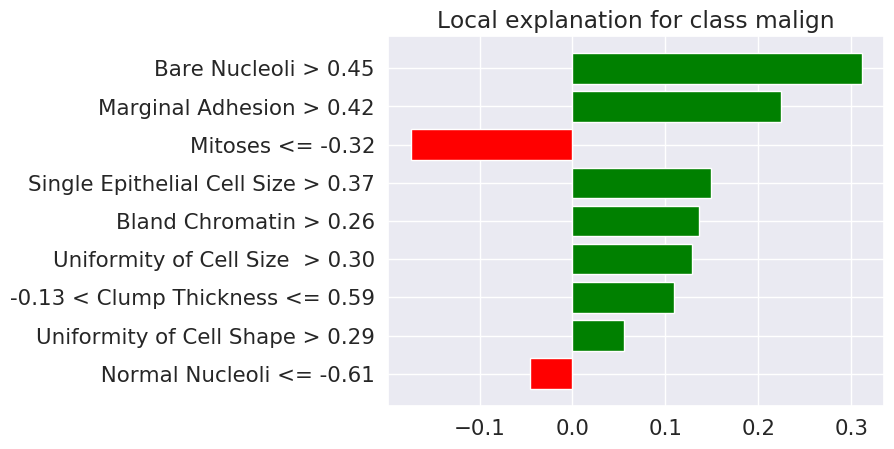

In [18]:
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
import numpy as np

def predict(qc):
    global model
    prediction_Class_1 = model.predict_proba(qc) 
    x = np.zeros((prediction_Class_1.shape[0], 1))
    probability = (x + 1) - prediction_Class_1
    final = np.append(probability,prediction_Class_1, axis=1)
    return final

X_explain = X_test
explainer = lime.lime_tabular.LimeTabularExplainer(training_data=X_train,
                                                   feature_names=["Clump Thickness","Uniformity of Cell Size ","Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nucleoli", "Bland Chromatin"," Normal Nucleoli", "Mitoses"],
                                                   discretize_continuous=True,
                                                   class_names=["benign", "malign"],
                                                   mode="classification",
                                                   verbose=True)
print(np.array([X_test[0,:]]).shape)
print(model.predict_proba(np.array([X_test[0,:]])))

#Explaining first subject in test set using all 30 features
exp = explainer.explain_instance(X_test[21,:], predict,num_features=10)
#Plot local explanation
plt = exp.as_pyplot_figure()
#plt.tight_layout()
exp.show_in_notebook(show_table=True)

## THE END 